How to define a string or file directory according to input parameters:

In [ ]:
def __init__(self, mode="train"):
    data_root = f"stenosis_data/{mode}"

How to change the data type of some tensor:

In [ ]:
self.imgs[idx].float(), self.masks[idx].long()

How to use python to find the absolute path of the current directory and then generate the absolute path of some file in the 
same directory

In [ ]:
import os
directory = os.path.dirname(os.path.abspath(__file__))
filepath = os.path.join(directory, "binary.bin")

About dataloader and dataset

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

#### Differences between .train() and .eval()
.train() sets the module in training mode, which activates behaviors specific to training, such as:
Dropout layers will randomly drop out some neurons to prevent overfitting.


Batch Normalization layers will track the running mean and variance of the inputs to learn proper normalization statistics for the current mini-batch.


.eval() sets the module in evaluation/inference mode, deactivating behaviors specific to training:
Dropout layers will pass all neurons without dropping any.


Batch Normalization layers will use the running mean and variance computed during training to normalize the inputs, ensuring deterministic outputs.

#### What is batch normalization

Batch Normalization is a technique used in deep neural networks to improve the training process and allow higher learning rates. It normalizes the inputs to each layer to have a mean of 0 and a standard deviation of 1, stabilizing the learning process and accelerating convergence.

How Batch Normalization Works
During training, Batch Normalization performs the following steps for each mini-batch:
Compute the mean and variance of the mini-batch inputs to a layer.
Normalize the inputs by subtracting the mean and dividing by the square root of the variance plus a small constant (epsilon) to avoid dividing by zero.
Scale and shift the normalized inputs using two learnable parameters (gamma and beta) to allow the network to recover the original activation statistics if needed.

The key aspects of Batch Normalization are:
It normalizes the activations of each layer, preventing the internal covariate shift that can slow down or destabilize training.

It introduces scale (gamma) and shift (beta) parameters that are learned during training, allowing the network to optimize the normalization for each layer.

During inference, it uses the moving averages of mean and variance computed during training to normalize the inputs, ensuring deterministic outputs.

Benefits of Batch Normalization
Allows higher learning rates and faster convergence during training.

Reduces the risk of vanishing or exploding gradients.

Acts as a regularizer, slightly reducing the need for other regularization techniques like dropout.
Makes the optimization landscape smoother, making training easier.
Allows each layer to learn on a more normalized input distribution.
Overall, Batch Normalization is a powerful technique that improves the training process and generalization performance of deep neural networks by normalizing layer inputs and introducing learnable parameters to optimize the normalization.

#### Cosine annealing learning rate:

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
lr_scheduler.step()

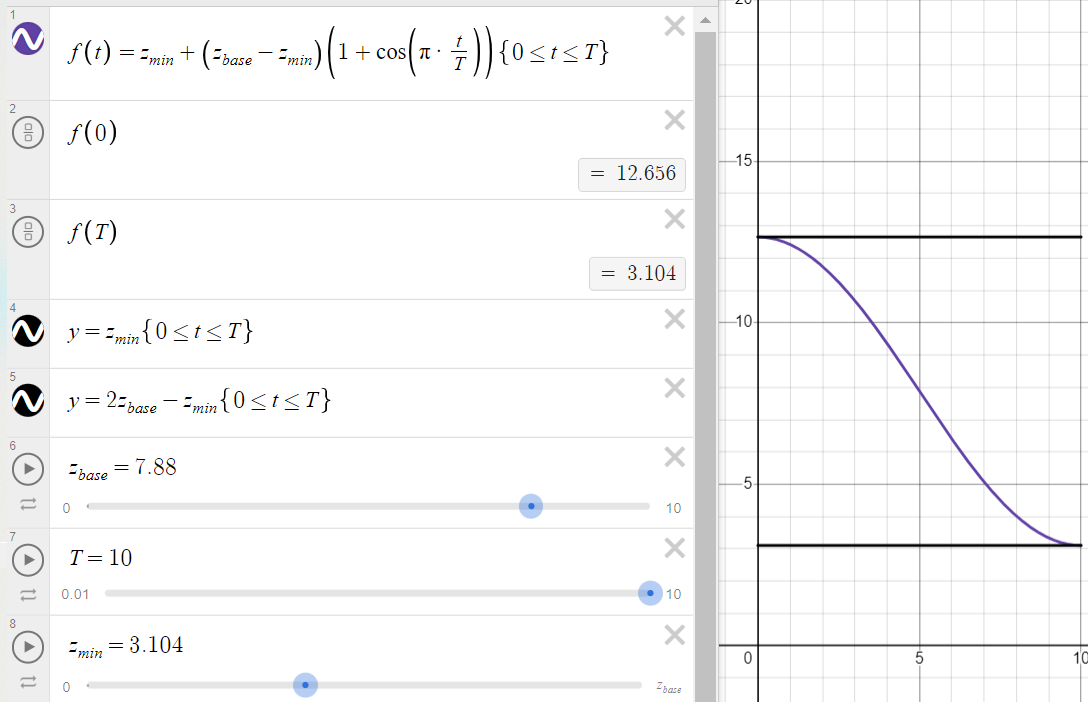

### Type checking in python

https://github.com/patrick-kidger/jaxtyping/blob/main/docs/api/array.md

When calling a function, variable-size axes and symbolic axes will be matched up across all arguments and checked for consistency. (See Runtime type checking.)



In [ ]:
from beartype import beartype
from jaxtyping import Float, Int, jaxtyped
from torch import Tensor

def get_Qs(self, 
            state: Float[Tensor, "batch_size state_dim"], 
            action: Float[Tensor, "batch_size action_dim"], 
            reward: Float[Tensor, "batch_size"], 
            next_state: Float[Tensor, "batch_size state_dim"], 
            done: Int[Tensor, "batch_size"]
        ) -> tuple[Float[Tensor, "batch_size"], Float[Tensor, "batch_size"]]:
        
        """
        Obtain the Q and target Q values from the agent's Q networks.
        Hint: this is the get_Q and get_Q_target method of Homework 2 combined.
        ins:
            state: Nx8 
            action: Nx2
            reward: Nx1
            next_state: Nx8
            done: Nx1
        ous:
            Q:Nx1
            Q_target: Nx1   without double Q nets, 
            $
            Q(s,a;\theta^-)= r(s,a) +
            \gamma Q(s',\mu^\prime(s'|\theta^{\mu^\prime}) ;\theta^{Q^\prime})
            $
        """